# **Dengue Fever Spread Prediction**

**1.0 Business Understanding**

**1.1 Introduction**

Dengue is a viral disease caused by the bite of a mosquito infected with any one of four; (DENV-1, DENV-2, DENV-3 and DENV-4) specific Dengue viruses.

Dengue virus is transmitted by female mosquitoes mainly of the species Aedes aegypti and, to a lesser extent, Ae. albopictus. These mosquitoes are also vectors of chikungunya, yellow fever and Zika viruses. Dengue is widespread throughout the tropics, with local variations in risk influenced by climate parameters as well as social and environmental factors.

**1.2 Problem Statement**

Dengue fever has been rampant majorly in subtropical areas. It affects everyone from the young to the old people, sometimes causing death. We venture into this research to find the major environmental factors that enhance the spread of Dengue fever per week in San Juan, Puerto Rico and Iquitos, Peru in order to give better insights on areas that are most affected and how to counter it.

Our goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. 


**1.3 Main Objectives**

Using environmental data collected by various U.S. Federal Government agencies, Predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru.

**1.4 Specific Objectives**

  1. Compare temperature changes during the year between the two cities.
  2. Compare precipitation distribution  between the two cities
  3. Compare Humidity change during the year between cities
  4. Find the number of infections per city accross the weeks of the year
  5. Find which week period that had the greatest spike of the infections


**1.5 Process**

The breakdown for how all these steps were executed in this stage is given below:

  1. Importing required libraries.

  2. Importing dataset.

  3. Data preprocessing.

  4. Explaratory Data Analysis.

  5. Splitting Dataset (Training and testing).

  6. Building and training model.

  7. Testing for accuracy.

  8. Prediction.

  **1.6 Columns Description**


*   precipitation_amt_mm – Total precipitation
*   city – City abbreviations: sj for San Juan and iq for Iquitos


*   week_start_date – Date given in yyyy-mm-dd format
*   station_max_temp_c – Maximum temperature


*   station_min_temp_c – Minimum temperature
*   station_avg_temp_c – Average temperature

*   station_precip_mm – Total precipitation
*   station_diur_temp_rng_c – Diurnal temperature range

*   reanalysis_sat_precip_amt_mm – Total precipitation
*   reanalysis_dew_point_temp_k – Mean dew point temperature

*   reanalysis_air_temp_k – Mean air temperature
*   reanalysis_relative_humidity_percent – Mean relative humidity

*   reanalysis_specific_humidity_g_per_kg – Mean specific humidity
*   reanalysis_precip_amt_kg_per_m2 – Total precipitation

*   reanalysis_max_air_temp_k – Maximum air temperature
*   reanalysis_min_air_temp_k – Minimum air temperature

*   reanalysis_avg_temp_k – Average air temperature
*   reanalysis_tdtr_k – Diurnal temperature range

*   ndvi_se – Pixel southeast of city centroid
*   ndvi_sw – Pixel southwest of city centroid

*   ndvi_ne – Pixel northeast of city centroid
*   ndvi_nw – Pixel northwest of city centroid



**1.7 Success Metrics**

We are going to use mean absolute error(MAE) as our accuracy score where a model with the lowest value will be selected.



















# **2.0 Loading the data**

**2.1 Loading libraries**

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np

#Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

**2.2 Loading the data**

In [2]:
#Loading the datasets
df1 = pd.read_csv("dengue_features_train.csv",parse_dates=[3])
df2 = pd.read_csv("dengue_features_test.csv",parse_dates=[3])
df3 = pd.read_csv("dengue_labels_train.csv")

In [3]:
#Previewing the dataset
df1.head(2)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30   0.1226  0.103725  0.198483   
1   sj  1990          19      1990-05-07   0.1699  0.142175  0.162357   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  

[2 rows x 24 columns]

In [4]:
#Previewing the top of labels dataset
df3.head(3)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4

In [5]:
#Previewing the first five entries of test set
df2.head(3)

city  year  weekofyear week_start_date  ndvi_ne  ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189  -0.0189  0.102729   
1   sj  2008          19      2008-05-06  -0.0180  -0.0124  0.082043   
2   sj  2008          20      2008-05-13  -0.0015      NaN  0.151083   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  

[3 rows x 24 columns]

In [6]:
#Merging the training dataset with the labels dataset on the the common
# columns that are city, year and week of the year
df = pd.merge(df1,df3)
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [7]:
#Viewing the shape of the datasets
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1456, 24)
(416, 24)
(1456, 4)


From the shapes of the datasets we note that the labels dataset has three columns similar to the training columns the only difference being the labels column. The test dataset is a holdout dataset from 2008 to 2010 where they do not overlap with the train dataset.

In [8]:
#Checking the shape of the new dataset
df.shape

(1456, 25)

# **3.0 Data cleaning**

**3.1 Checking for null Values**

In [9]:
#Checking for null values
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

We note that we have null values from some columns.

In [10]:
#Since this is majorly a climatical dataset we decide fill the null values with the values of the previous week.
#We choose this method because the climatical condition do not vary much week to week.
df.fillna(method='ffill', inplace=True)

In [11]:
#Checking if there are any null values left
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [12]:
#Filling missing values in the test set
df2.fillna(method='ffill', inplace=True)
df2.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [13]:
#Checking the datatypes of various columns 
df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

By checking datatypes,  all are in their correct formats apart from week start date column, so we change to datetime format

In [14]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df2['week_start_date'] = pd.to_datetime(df2['week_start_date'])


In [15]:
#Checking the changes
df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

**3.2 Checking for duplicates**

In [16]:
#Checking for duplicates
print(df.duplicated().any())
print(df2.duplicated().any())

False
False


There are no duplicated entries

In [17]:
df.describe()


year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean   2001.031593    26.503434     0.131271     0.128068     0.202606   
std       5.408314    15.019437     0.138527     0.119561     0.074409   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.039100     0.048250     0.152795   
50%    2002.000000    26.500000     0.113900     0.115926     0.195664   
75%    2005.000000    39.250000     0.232018     0.213429     0.247461   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1456.000000           1456.000000            1456.000000   
mean      0.201987             45.686937             298.697965   
std       0.083592             43.779318               1.361950   
min      -0.063457              0.000000             294.635714   
25%       0.144455              9.655000             297.654643   
50%       0.190121             38.235000             298.646429   
75%       0.246775             70.227500             299.827500   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
count            1456.000000                  1456.000000  ...   
mean              299.221483                   295.245445  ...   
std                 1.262676                     1.527527  ...   
min               294.892857                   289.642857  ...   
25%               298.257143                   294.119643  ...   
50%               299.285714                   295.639286  ...   
75%               300.207143                   296.460000  ...   
max               302.928571                   298.450000  ...   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1456.000000                   1456.000000   
mean                              82.176203                     45.686937   
std                                7.161016                     43.779318   
min                               57.787143                      0.000000   
25%                               77.185714                      9.655000   
50%                               80.301429                     38.235000   
75%                               86.406429                     70.227500   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1456.000000        1456.000000   
mean                               16.745565           4.898656   
std                                 1.542276           3.542340   
min                                11.715714           1.357143   
25%                                15.560000           2.328571   
50%                                17.087143           2.857143   
75%                                17.977500           7.617857   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1456.000000              1456.000000         1456.000000   
mean            27.180313                 8.085646           32.443338   
std              1.280861                 2.122836            1.960769   
min             21.400000                 4.528571           26.700000   
25%             26.300000                 6.528571           31.100000   
50%             27.400000                 7.364286           32.800000   
75%             28.132143                 9.600000           33.900000   
max             30.800000                15.800000           42.200000   

       station_min_temp_c  station_precip_mm  total_cases  
count         1456.000000        1456.000000  1456.000000  
mean            22.099863          39.194162    24.675137  
std

In [18]:
#Splitting the dataset into different cities
df_sj =df[df['city']=='sj']
df_iq = df[df['city'] == 'iq']
df_sj.head()
print(df_sj.shape)

(936, 25)


In [19]:
#Checking unique values for year column 
df_sj['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [20]:
#Checking the shape of iquitos city dataset
df_iq.head()
print(df_iq.shape)

(520, 25)


In [21]:
#Finding the year spread for the year column in the Iquitos city dataset
df_iq['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

**3.3 Checking for outliers**

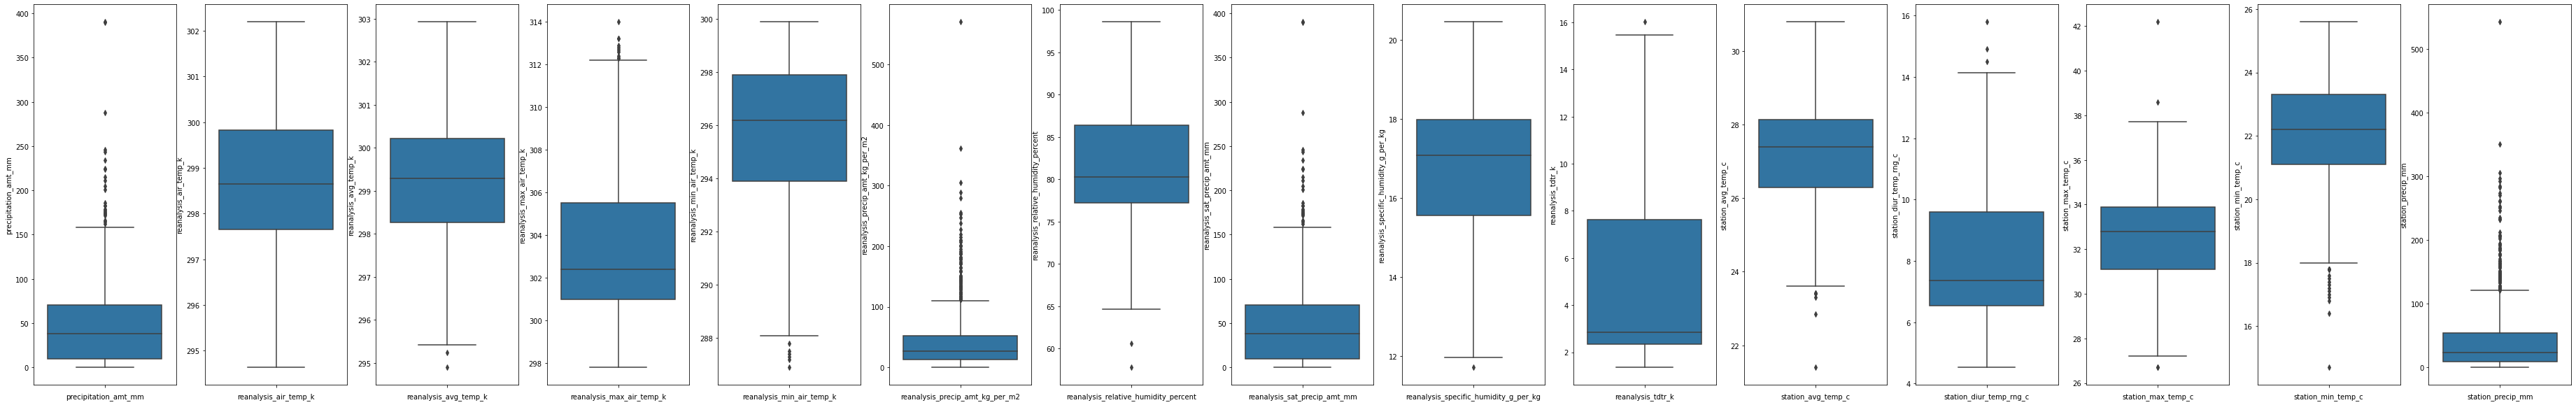

In [22]:
#Plotting boxplots to detect outliers in the various columns

col_names = ['precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

fig,ax = plt.subplots(1,len(col_names),figsize=(65,10))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

We have outliers in some columns but since by dropping them we will missing a few weeks in some years.

# **4.0** **EXPLORATORY DATA ANALYSIS**

**4.1** **UNIVARIATE DATA ANALYSIS**

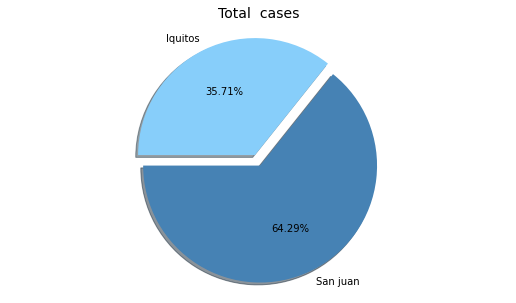

In [23]:
#Viewing the ratio of total cases among the cities:
city = df['city'].value_counts()
city
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['San juan','Iquitos']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("Total  cases", size = 25, fontsize = fontsize)
plt.pie(city,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Since San Juan has a longer period of data collection we note that there are more entries from that city compared to Iquitos

Text(0.5, 1.0, 'Total cases in the cities')

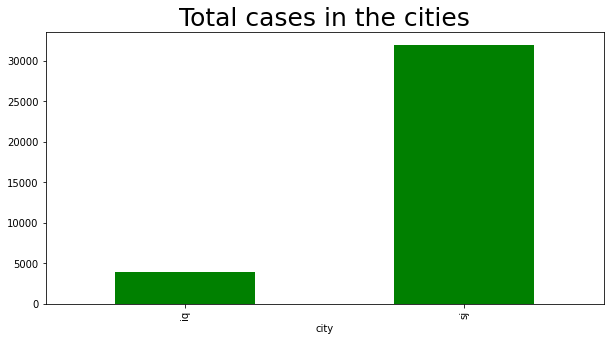

In [24]:
#visualising the total number of cases in san juan and iquatos
plt.figure(figsize = (10,5))
fontsize = 14
table = df.groupby('city').sum()
table['total_cases'].plot(kind = 'bar',color = 'green')
plt.title("Total cases in the cities", size = 25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of precipitation in san juan ')

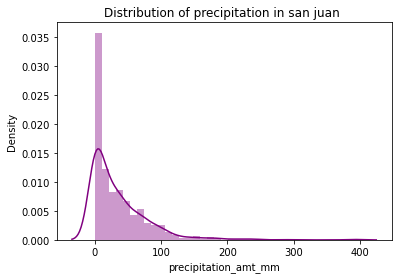

In [25]:
# Plot for precipitation_amt_mm
sns.distplot(df_sj.precipitation_amt_mm, color= 'purple',  );
fontsize = 14
#Creating the labels for the plot
plt.title("Distribution of precipitation in san juan ")
#plt.xlabel("bins")
#plt.ylabel("Precipitation amount")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of precipitation in iquitos ')

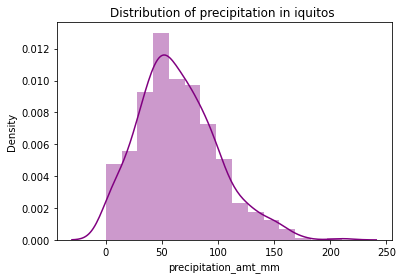

In [26]:
# Plot for precipitation_amt_mm
sns.distplot(df_iq.precipitation_amt_mm, color= 'purple', bins = 15 );
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of precipitation in iquitos ")
#plt.xlabel("bins")
#plt.ylabel("Precipitation amount")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_avg_temp_k in iquitos')

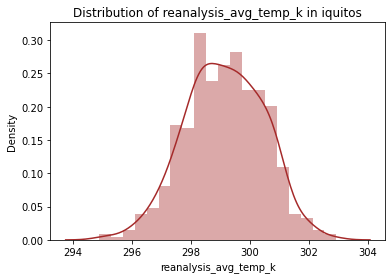

In [27]:
# Plot for reanalysis_avg_temp_k

sns.distplot(df_iq.reanalysis_avg_temp_k , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_avg_temp_k in iquitos")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_avg_temp_k")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_avg_temp_k in san juan')

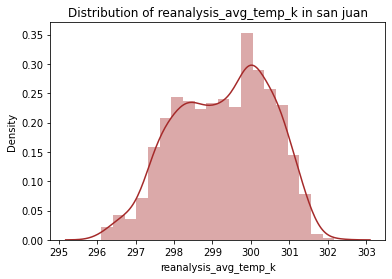

In [28]:
# Plot for reanalysis_avg_temp_k
sns.distplot(df_sj.reanalysis_avg_temp_k , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_avg_temp_k in san juan")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_avg_temp_k")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_specific_humidity_g_per_kg in san juan')

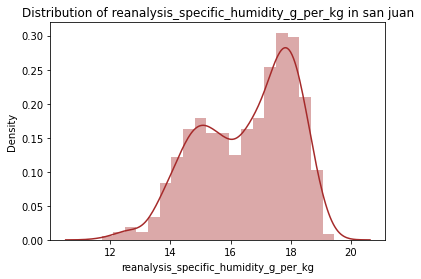

In [29]:
# Plot for reanalysis_specific_humidity_g_per_kg
sns.distplot(df_sj.reanalysis_specific_humidity_g_per_kg , color= 'brown', bins=20);
fontsize = 14

#Creating the labels for the plot
plt.title("Distribution of reanalysis_specific_humidity_g_per_kg in san juan")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_specific_humidity_g_per_kg")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of reanalysis_specific_humidity_g_per_kg in iquatos')

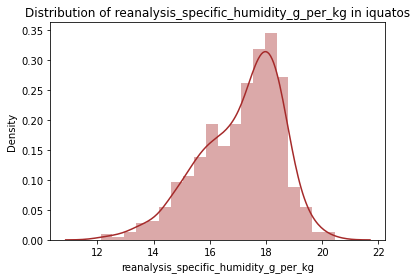

In [30]:
# Plot for reanalysis_specific_humidity_g_per_kg
sns.distplot(df_iq.reanalysis_specific_humidity_g_per_kg , color= 'brown', bins=20);
fontsize = 14


#Creating the labels for the plot
plt.title("Distribution of reanalysis_specific_humidity_g_per_kg in iquatos")
#plt.xlabel("bins")
#plt.ylabel("reanalysis_specific_humidity")

**4.2** **BIVARIATE ANALYSIS**

Text(0, 0.5, 'Total number of cases')

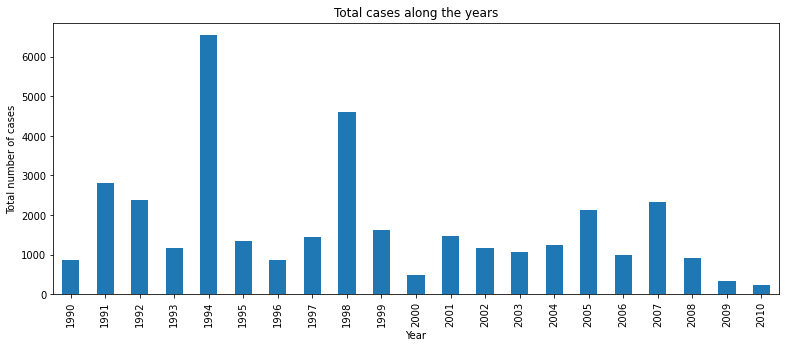

In [31]:
#Visualizing Total Cases Per Year
x = df.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize = 14
plt.title("Total cases along the years")
plt.xlabel("Year")
plt.ylabel("Total number of cases")


The bar plots show that The most cases were recorded in 1994 with the least number of recordings being in the year 2010


Text(0, 0.5, 'Total number of cases')

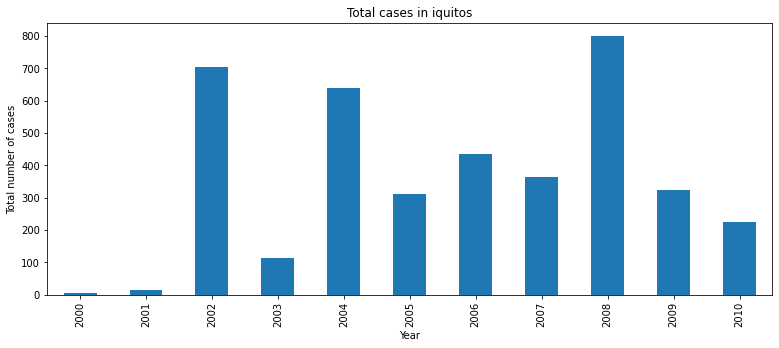

In [32]:
#Visualizing Total Cases Per Year in iquatos
x = df_iq.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize =  14
plt.title("Total cases in iquitos")
plt.xlabel("Year")
plt.ylabel("Total number of cases")

Dividing the dataset into different cities we note that cases for Iquitos city begun being recorded in 2000, where the number of cases having a peak in 2008 within recorded cases getting close to 800 with the least recordings being for the year 2000.

Text(0, 0.5, 'Total number of cases')

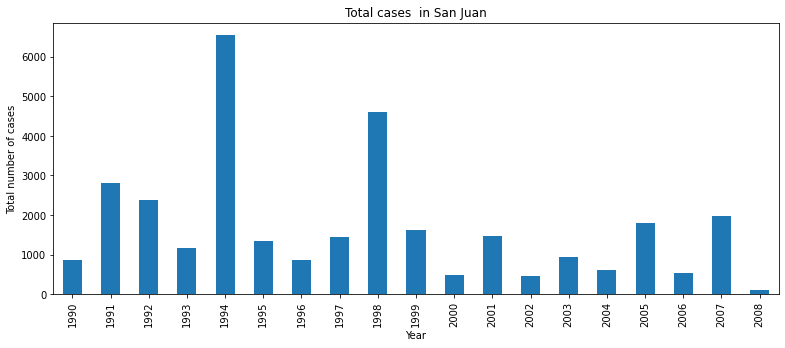

In [33]:
#Visualizing Total Cases Per Year
x = df_sj.groupby(['year']).sum().copy()
ax = x.total_cases.plot(kind='bar', figsize=(13, 5));

#Creating the labels for the plot
fontsize = 14
plt.title("Total cases  in San Juan")
plt.xlabel("Year")
plt.ylabel("Total number of cases")

Total cases for San Juan city begun being recorded from 1990 to 2008 within cases recorded most in 1994 with least recordings being in the year 2008.

Text(0, 0.5, 'Total Precipitation in mm')

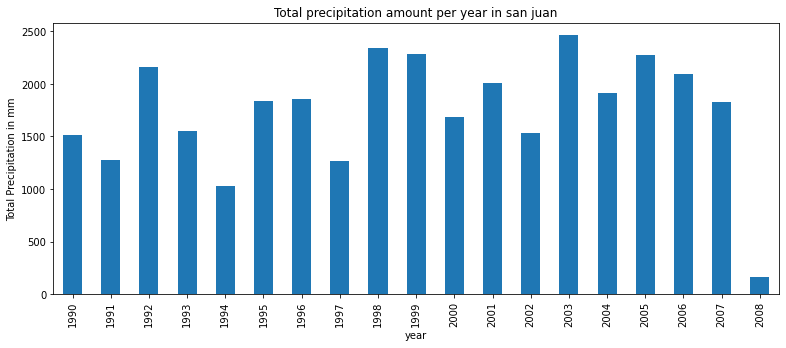

In [34]:
#Creating a bar plot of the total precipitation distribution along the years
x = df_sj.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year in san juan")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

Text(0, 0.5, 'Total Precipitation in mm')

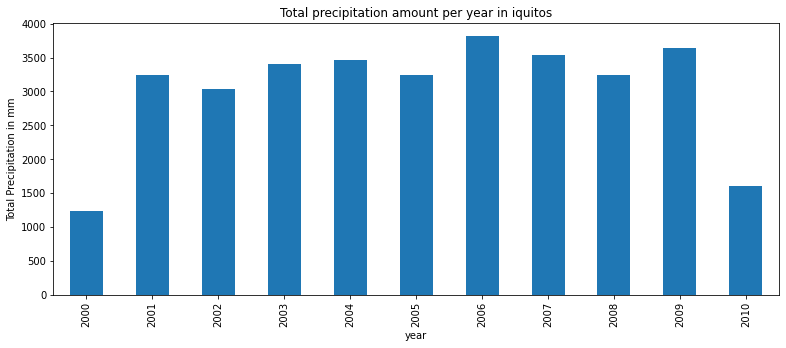

In [35]:
#Creating a bar plot of the total precipitation distribution along the years in iquatos
x = df_iq.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year in iquitos")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

Text(0, 0.5, 'Total Precipitation in mm')

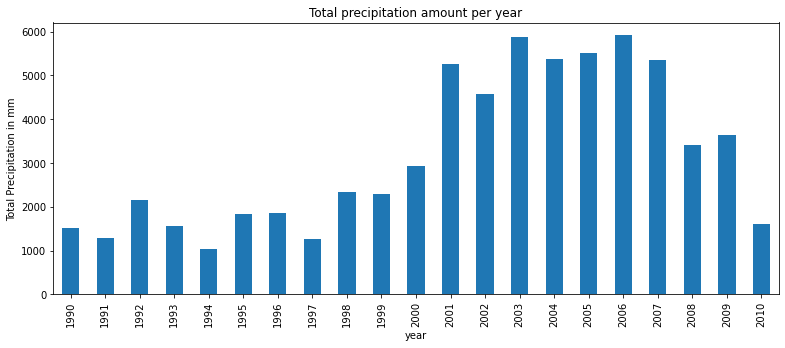

In [36]:
#Creating a bar plot of the total precipitation distribution along the years
x = df.groupby(['year']).sum().copy()
ax = x.precipitation_amt_mm.plot(kind='bar', figsize=(13, 5));

#Creating labels for the plot
fontsize = 14
plt.title("Total precipitation amount per year")
plt.xlabel("year")
plt.ylabel("Total Precipitation in mm")

**Weather conditions**

As we can see from the list of weather features, there are a couple of overlapping features that we are using. such as:

  * precipitation_amt_mm, reanalysis_precip_amt_kg_per_m2,  reanalysis_sat_precip_amt_mm, and station_precip_mm all measure the rainfall in various ways

  * reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, and station_min_temp_c all measure various forms of the temperature.

  * reanalysis_relative_humidity_percent and reanalysis_specific_humidity_g_per_kg measure the humidity.

From that we can pick one from each category  and compare the change accross different weeks of the year.


In [37]:
#Since the measurements of humidity, rainfall and temperature are different we are going to standardize them
from sklearn.preprocessing import StandardScaler

In [38]:
# Selecting the three features to represent different weather conditions
df_sj_imp = df_sj[['station_avg_temp_c', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent' ]]
df_iq_imp = df_iq[[ 'station_avg_temp_c', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent' ]]

#Standardize San Juan
ss = StandardScaler()
Xs = ss.fit_transform(df_sj_imp[df_sj_imp.columns])
df_sj_s = pd.DataFrame(Xs, columns = df_sj_imp.columns, index=df_sj_imp.index)
df_sj_s['weekofyear'] = df_sj['weekofyear']

#Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(df_iq_imp[df_iq_imp.columns])
df_iq_s = pd.DataFrame(Xs, columns = df_iq_imp.columns, index=df_iq_imp.index)
df_iq_s['weekofyear'] = df_iq['weekofyear']

Text(0.5, 0, 'Week of Year')

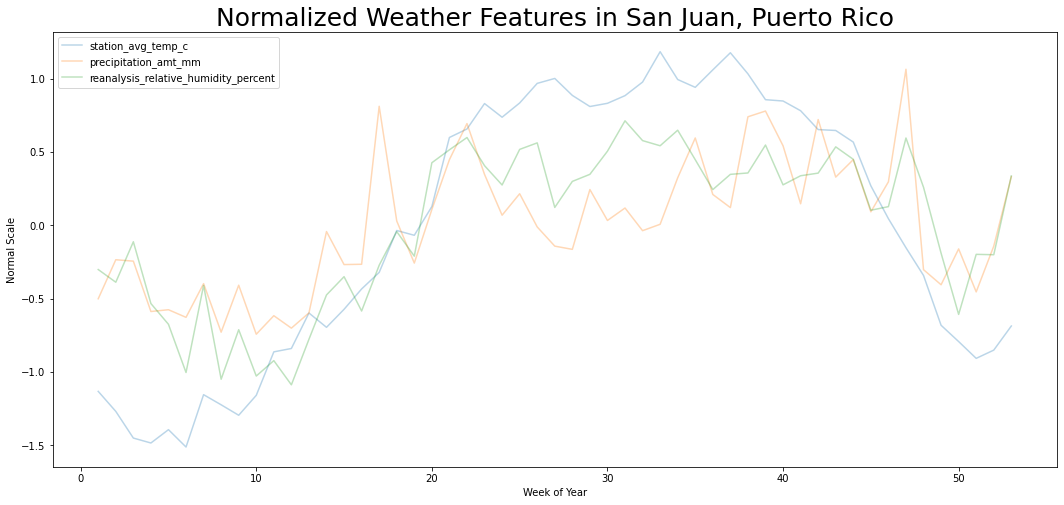

In [39]:
#Plot all Normalized weather data in San Juan

#for i in (df_sj_s.columns[:-1]):
df_sj_s.groupby('weekofyear').mean()\
.plot(alpha = .3, figsize = (18, 8))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5))

from cycler import cycler 
default_cycler = (cycler(color=['#006400','#8B0000','#FF1493']) +
                  cycler(linestyle=['-', '-', '-']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

plt.legend(loc = 'best')
plt.title('Normalized Weather Features in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Text(0.5, 0, 'Week of Year')

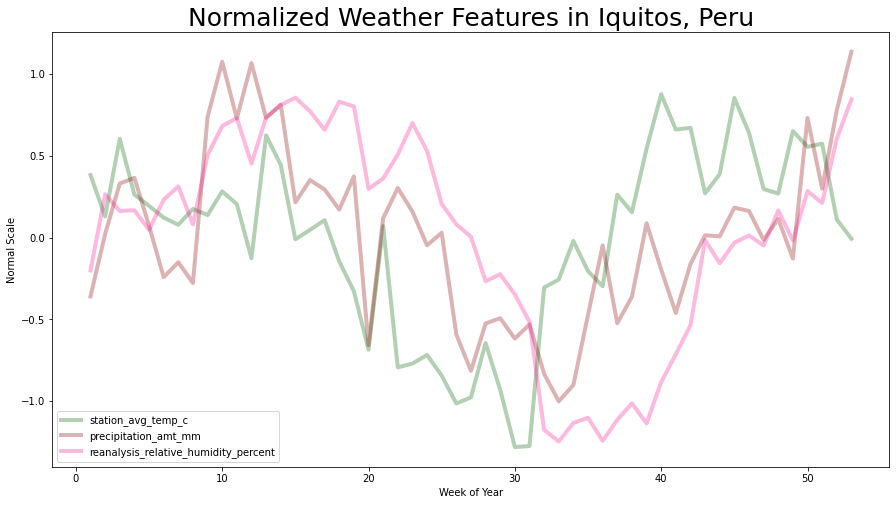

In [40]:
#Plot all Normalized weather data in Iquitos

for i in (df_iq_s.columns[:-1]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (15, 8))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))

from cycler import cycler 
default_cycler = (cycler(color=['#006400','#8B0000','#FF1493']) +
                  cycler(linestyle=['-', '-', '-']))

plt.legend(loc = 'best')
plt.title('Normalized Weather Features in Iquitos, Peru', size = 25)
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Each city follows a different trend (which makes sense, being in different hemispheres and climates).

**San Juan**: The first ten weeks tend to have lower values of the the weather conditions but later on they begin increasing steadily. We can say that the city is  Hot, Wet and Humid between the 20th and 40th week of the year compared to Iquitos.

**Iquitos**: Variaion. The weather features do not move as tightly as San Juan does. All three features tend to drop simultanously between week 20 and 30 then increase steadily after that. Also the temperature, humidity and precipitation features tend to be higher at the start of the year compared to San Juan.

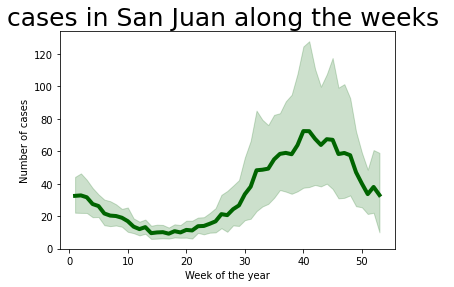

In [41]:
#Plotting the distribution of cases across the months in san Juan
sns.lineplot(x="weekofyear", y="total_cases", data=df_sj)

#Creating labels for the line graph
plt.title("cases in San Juan along the weeks ", size = 25)
plt.xlabel("Week of the year")
plt.ylabel("Number of cases")

plt.show()

There is a drop in the number of cases from the first week till the twenthieth week, then there is an increase till the 40th week. Then the drop begins later in the weeks. This can be attributed to the fact that the city recieves more precipitation, has higher temperatures and more humidity which is a favourable condition for mosquitos. These same environmental conditions begin to drop later towards the end of the year resulting to a decrease in the number of cases recorded.

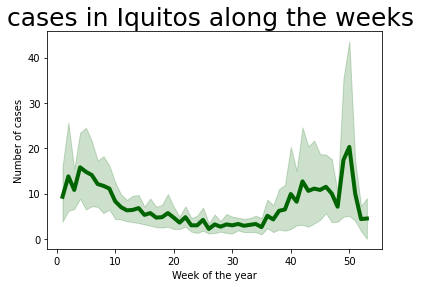

In [42]:
sns.lineplot(x="weekofyear", y="total_cases", data=df_iq)

#Creating labels for the line graph
plt.title("cases in Iquitos along the weeks ", size = 25)
plt.xlabel("Week of the year")
plt.ylabel("Number of cases")

plt.show()

There is a notable drop in the cases as the year begins until towards the 35th week then the cases begin to increase until the 50th week then drops steadily. This can be as a result of the favourable  weather begining to drop from the tenth week until the 30th weeek then later on the environmental factors begin to become favourable for mosquito breeding that leads to more cases towards the end of the year.

Text(0, 0.5, 'Precipitation')

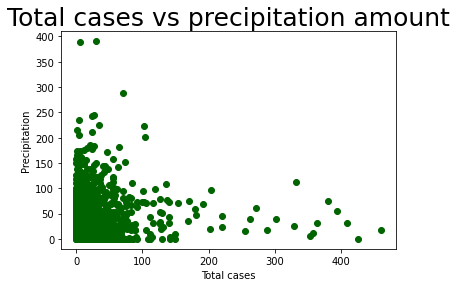

In [43]:
#create scatterplot of total cases  vs. precipitation amount
plt.scatter(df['total_cases'], df['precipitation_amt_mm'])
plt.title('Total cases vs precipitation amount', size = 25)
plt.xlabel('Total cases')
plt.ylabel('Precipitation')

There seems to be a scenario where most cases are recorded with precipitation amounts lower than 200 mm.

Text(0, 0.5, 'Average temperature')

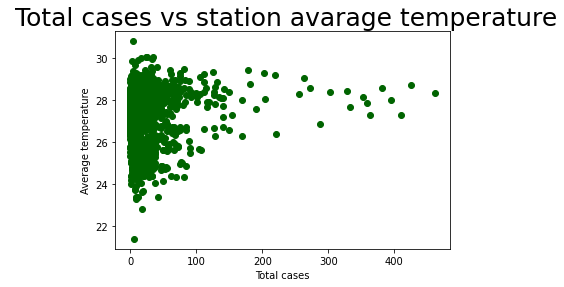

In [44]:
#create scatterplot of total cases  vs. station average temperature
plt.scatter(df['total_cases'], df['station_avg_temp_c'])
plt.title(' Total cases vs station avarage temperature', size = 25)
plt.xlabel('Total cases')
plt.ylabel('Average temperature')

Majority of cases tend to be recorded when the average temperatures are above 24 degrees. This can be attributed to the fact that mosquitos need a warm environment to breed and to thrive in. 

**Vegetation Cover change over time**

In [45]:
# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

In [46]:
# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


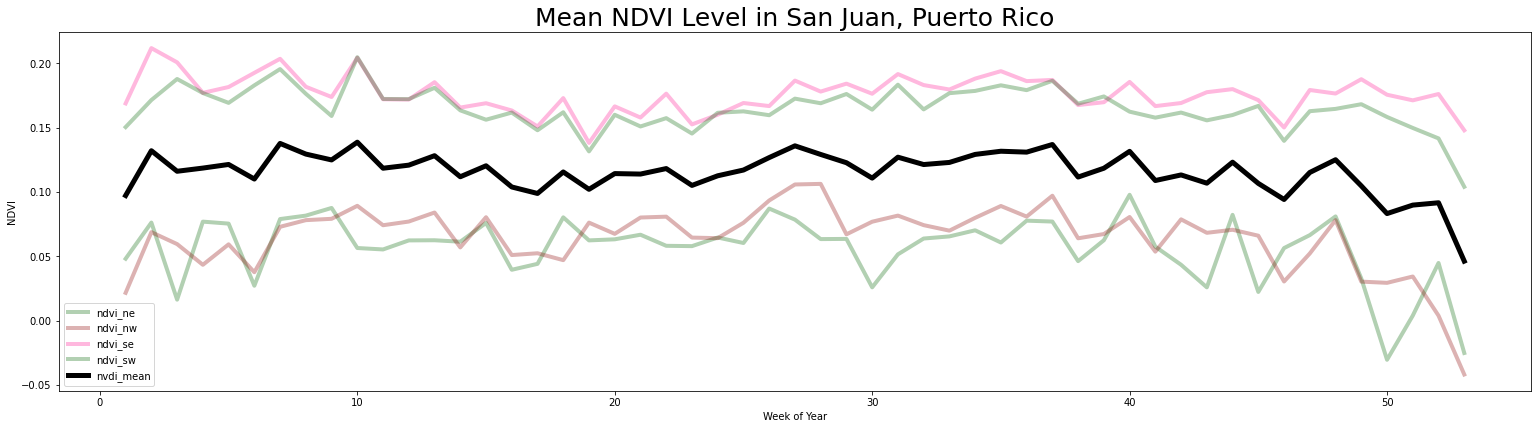

In [47]:
# plot week by week and yearly average for San Juan
fig, ax = plt.subplots(figsize=(22, 12))
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in San Juan, Puerto Rico', size = 25)
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)

**Plot week by week and yearly average for Iquitos**

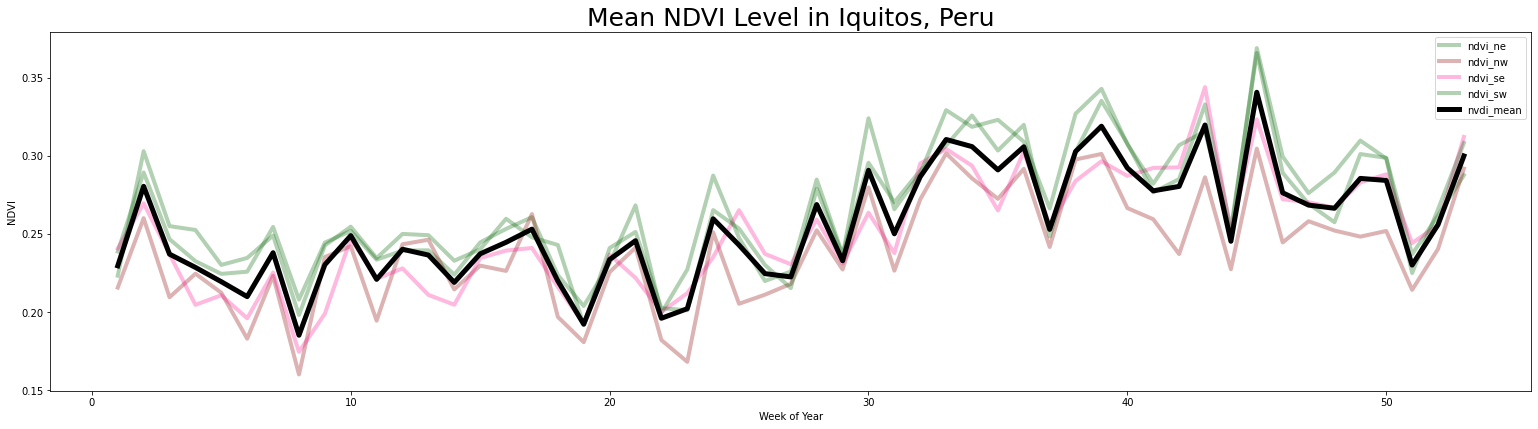

In [48]:
# plot week by week and yearly average for Iquitos

fig, ax = plt.subplots(figsize=(22, 12))
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_iq.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in Iquitos, Peru', size = 25)
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')


plt.tight_layout(pad=3)

**NVDI Feature Conclusions**

San Juan: The NVDI scores in the Southwest and Southeast are consistently lower than the scores of the Northwest and Northeast quadrants. After averaging the score at each week over the 10 years of data, we can see that the NVDI score remains fairly constant. There is a minor dip in the last 4 weeks of the year (December) that could be interesting. In addition, we can see the impact of the front fill method for data imputation. In 1995, there were a few missing rows of NVDI data. The flat line comes from repeating the last known value over and over until an observation was recorded again.

Iquitos: Iquitos shows a more homogenous NVDI score among its four quadrants. Visually, I can see an increase from Week 20 at 0.20 to Week 40 at 0.30 (May to October) in the NVDI scores .

**Correlation Plot**

In [49]:
#Plotting separate correlation plot to see if there is  a difference 
sj = df_sj.drop(['city', 'year', 'weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw'],axis = 1)
iq = df_iq.drop(['city', 'year', 'weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw'],axis = 1)

Text(0.5, 1.0, 'Correlation plot among variables in Iquitos')

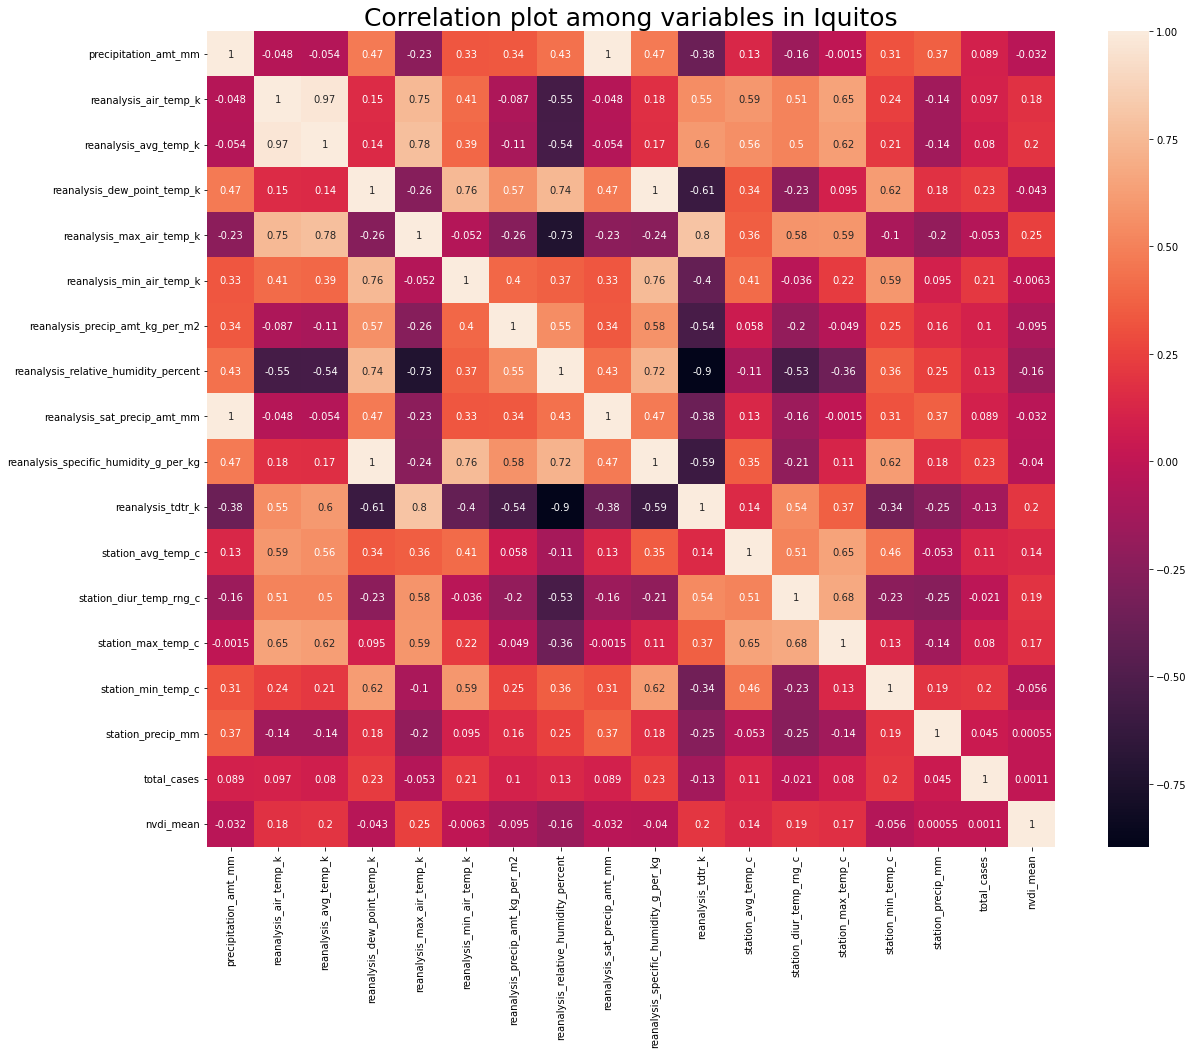

In [50]:
#Correlation Plot for Iquitos
f = plt.figure(figsize=(19, 15))
sns.heatmap(iq.corr(), xticklabels = iq.corr().columns, yticklabels = iq.corr().columns, annot=True)
plt.title("Correlation plot among variables in Iquitos", size = 25)

From the correlation plots separately we notice that there are no distinct difference from the relationships when the cities are combined and when separated.

Text(0.5, 1.0, 'Correlation plot among variables in San Juan')

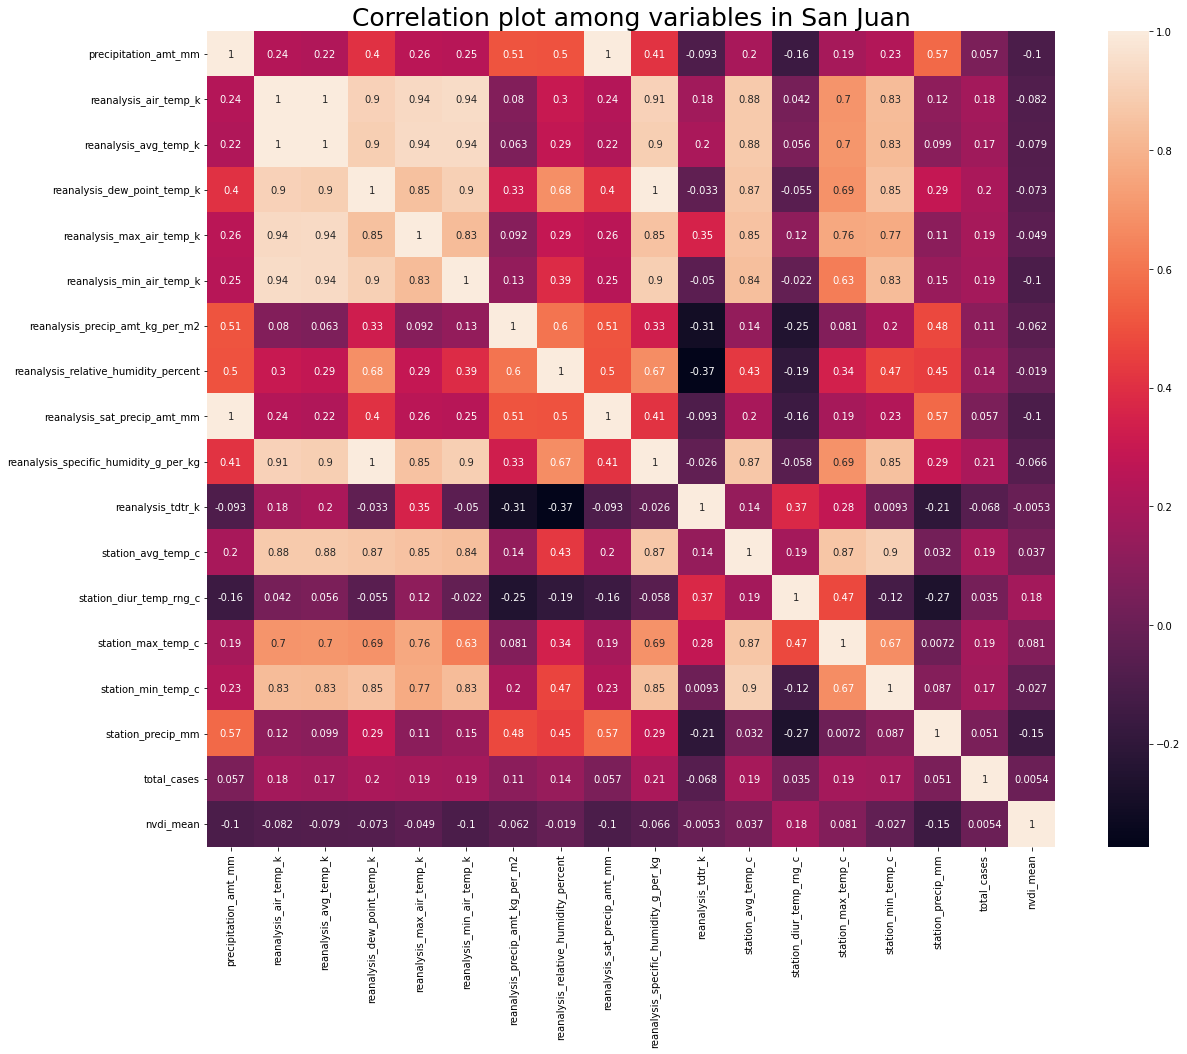

In [51]:
#Correlation Plot for Iquitos
f = plt.figure(figsize=(19, 15))
sns.heatmap(sj.corr(), xticklabels = sj.corr().columns, yticklabels = iq.corr().columns, annot=True)
plt.title("Correlation plot among variables in San Juan", size = 25)

From the Correlation plot of the combined cities we note the following:
 * There are perfect positive correlations between some variables such as reanalysis precipitation amount and precipitation amount, reanalysis dew point and humidity, this means that they are displaying the same results so we are going to work with the one variable and drop the other one.

 * There is a strong positive correlation between minimum air temperature and average temperature.

 * Similarly there are strong positive correlations between
 reanalysis air humidity and reanalysis air temperature

**FEATURE ENGINEERING**

In [52]:
# Encoding the categorical variables.

from sklearn.preprocessing import LabelEncoder
categ= ['city']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [53]:
#Dropping the variables that do not contribute much to regression analysis
data_2 = df.drop(['year', 'week_start_date'], axis = 1)

**BORUTA TECHNIQUE**

In [54]:
pip install Boruta

     |████████████████████████████████| 56 kB 3.0 MB/s 


In [55]:
#Importing Boruta and other required libraries. 

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [56]:
#Loading the dataset, separating the features from the target variable, and 
#splitting the data into a train and a test set.

X = data_2.drop(['total_cases', 'city'], axis = 1)
y = data_2['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [57]:
#Creating a baseline RandomForrestClassifier model with all the features.

rf_all_features = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(X_train, y_train) 

mean_absolute_error(y_test, rf_all_features.predict(X_test))

16.080084178524483

In [58]:
#Creating a BorutaPy object with RandomForestClassifier as the estimator and ranking the features. 
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	15
I

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=69,
                                         random_state=RandomState(MT19937) at 0x7F74963D6AF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F74963D6AF0, verbose=2)

In [59]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [ 1 14 10  1  1 16  7 12  4  5  1  8  6 17  3  2 12 15  1 10  9]
No. of significant features:  5


In [60]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

Feature  Ranking
0                              weekofyear        1
18                     station_max_temp_c        1
4                                 ndvi_sw        1
10              reanalysis_min_air_temp_k        1
3                                 ndvi_se        1
15                      reanalysis_tdtr_k        2
14  reanalysis_specific_humidity_g_per_kg        3
8             reanalysis_dew_point_temp_k        4
9               reanalysis_max_air_temp_k        5
12   reanalysis_relative_humidity_percent        6
6                   reanalysis_air_temp_k        7
11        reanalysis_precip_amt_kg_per_m2        8
20                      station_precip_mm        9
19                     station_min_temp_c       10
2                                 ndvi_nw       10
7                   reanalysis_avg_temp_k       12
16                     station_avg_temp_c       12
1                                 ndvi_ne       14
17                station_diur_temp_rng_c       15
5                    precipitation_amt_mm       16
13           reanalysis_sat_precip_amt_mm       17

In [61]:
#Selecting the best features from boruta
boruta_df = data_2[['city','weekofyear', 'reanalysis_tdtr_k', 'reanalysis_min_air_temp_k', 'ndvi_sw', 'ndvi_se', 'total_cases']]

In [62]:
#Previewing the features
boruta_df.head()

city  weekofyear  reanalysis_tdtr_k  reanalysis_min_air_temp_k   ndvi_sw  \
0     1          18           2.628571                      295.9  0.177617   
1     1          19           2.371429                      296.4  0.155486   
2     1          20           2.300000                      297.3  0.170843   
3     1          21           2.428571                      297.0  0.235886   
4     1          22           3.014286                      297.5  0.247340   

    ndvi_se  total_cases  
0  0.198483            4  
1  0.162357            5  
2  0.157200            4  
3  0.227557            3  
4  0.251200            6

In [63]:
#Checking the shape of the dataset
boruta_df.shape

(1456, 7)

**SUPERVISED LEARNING**

**DECISION TREES**

In [64]:
#Dropping the year column
#df1 = df.drop(['year'], axis = 1)
df1 = df.drop(['week_start_date'], axis = 1)

In [65]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [66]:
#Finding the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [67]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best Min_samples:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('best_score',best_clf.best_score_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Max_depth: 5
Best Min_samples: 5
best_score -16.929395095341143


In [68]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree classifier

tree = DecisionTreeRegressor(max_depth=5, min_samples_split=5,random_state=0)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

In [69]:
#Finding the various accuracy metrics for the prediction
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
lda_feat = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 17.279403665167422
MSE 1072.2105179279347
RMSE 32.7446257869583
RMSLE 3.48873885050755
0.38183172321209047


**RANDOM FOREST REGRESSOR**

In [70]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [71]:
# Finding the best parameters.
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
params = {'bootstrap': [True, False],
 'max_depth': [5, 10, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 "n_estimators":[100,500]
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=3, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [72]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)

print('Best bootstrap:', best_clf.best_estimator_.get_params()['bootstrap'])
print('Best min_samples_leaf:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_clf.best_estimator_.get_params()['max_features'])
print('Best n_estimators:', best_clf.best_estimator_.get_params()['n_estimators'])
print('best_score',best_clf.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best bootstrap: False
Best min_samples_leaf: 2
Best Max_depth: 5
Best max_features: sqrt
Best n_estimators: 500
best_score -16.001961567814387


In [73]:
from sklearn.ensemble import RandomForestRegressor

#Initiating the random forest regressor:
Forest = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 2, random_state=42, max_depth=10)

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)

In [74]:
#Finding the accuracy scores 
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

random_forest = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 16.754499565799442
MSE 866.104682287343
RMSE 29.429656509842975
RMSLE 3.382002890748217
0.5006592175553609


**LIGHT GBM**

In [75]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [76]:
#parameter tuning
from lightgbm import LGBMRegressor
lg = LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [100,200]
             }
search = GridSearchCV(estimator=lg, n_jobs=-1, param_grid=param_dist, cv = 10, scoring="neg_mean_squared_error", verbose=5)

In [77]:
#finding the best parametres
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
{'learning_rate': 0.05, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 300}


1032.4404903473708

In [78]:
import lightgbm as lgb
model = lgb.LGBMRegressor(learning_rate=0.5, max_depth=50, n_estimators = 200, num_leaves = 300, random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='neg_mean_absolute_error')

[20]	training's l2: 262.556	valid_0's l2: 1079.72
[40]	training's l2: 103.753	valid_0's l2: 1107.93
[60]	training's l2: 50.0639	valid_0's l2: 1137.33
[80]	training's l2: 26.8207	valid_0's l2: 1167.11
[100]	training's l2: 16.8473	valid_0's l2: 1169.25
[120]	training's l2: 9.53736	valid_0's l2: 1163.73
[140]	training's l2: 6.72692	valid_0's l2: 1162.58
[160]	training's l2: 4.5242	valid_0's l2: 1162.28
[180]	training's l2: 2.77706	valid_0's l2: 1160.67
[200]	training's l2: 1.80783	valid_0's l2: 1158.65


LGBMRegressor(learning_rate=0.5, max_depth=50, n_estimators=200, num_leaves=300,
              random_state=42)

In [79]:
#Creating a prediction from the model
y_pred=model.predict(X_test)

In [80]:
#Finding its accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
lgbm = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 20.79205288896749
MSE 1158.6487333918521
RMSE 34.038929674592474
RMSLE 3.527504860043743
0.3319969549380273


**XG BOOST**

In [81]:
#Importing the necessary libraries
import xgboost as xgb
from sklearn import metrics
from xgboost import XGBRegressor

In [82]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=boruta_df.drop(['total_cases'],axis = 1)
y=boruta_df['total_cases']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=0)

In [83]:
#Finding the best parameters
# Parameter Tuning
model = xgb.XGBRegressor()
param_dist = {"max_depth": [10,30,50],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16]}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train,y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[03:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10, n_estimators=200)

In [84]:
#Fitting the best parameters to the model
model = xgb.XGBRegressor(max_depth=10,  n_estimators=200, learning_rate=0.1, random_state = 42)
                         
model.fit(X_train,y_train)

[03:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10, n_estimators=200, random_state=42)

In [85]:
#Creating a prediction from the model
y_pred=model.predict(X_test)

In [86]:
#Finding the accuracy scores basing on different metrics
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
xgboost = mean_absolute_error(y_test,y_pred)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

MAE 17.46810522873287
MSE 981.0766016273938
RMSE 31.32214235373107
RMSLE 3.4443252708819787
0.43437373343719954


In [87]:
#Model Comparison:
Models =  pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Light GBM', 'XG BOOST'],
                               
                     'Mean Absolute Error': [lda_feat, random_forest, lgbm, xgboost]})
Models.sort_values(by = 'Mean Absolute Error', ascending = True)

Model  Mean Absolute Error
1  Random Forest            16.754500
0  Decision Tree            17.279404
3       XG BOOST            17.468105
2      Light GBM            20.792053

# **TIME SERIES**

In [88]:
df_sj =df[df['city']=='sj']
df_iq = df[df['city'] == 'iq']

df_sj.head()
print(df_sj.shape)

(0, 25)


In [89]:
sj = df_sj.drop(['city','year'],axis = 1)
iq = df_iq.drop(['city','year'],axis = 1)

In [90]:
#create month variable
df_sj['month'] = df_sj['week_start_date'].dt.month
df_iq['month'] = df_iq['week_start_date'].dt.month


# train test split
#sj
sj_train = df_sj.loc[:'2007-04-20']
sj_Xtrain = sj_train.drop('total_cases', axis = 1)
sj_ytrain = sj_train[['total_cases']]

sj_test = df_sj.loc['2007-04-20':]
sj_Xtest = sj_test.drop('total_cases', axis = 1)
sj_ytest = sj_test[['total_cases']]

#iq
iq_train = df_iq.loc[:'2009-06-20']
iq_Xtrain = iq_train.drop('total_cases', axis = 1)
iq_ytrain = iq_train[['total_cases']]

iq_test = df_iq.loc['2009-06-20':]
iq_Xtest = iq_test.drop('total_cases', axis = 1)
iq_ytest = iq_test[['total_cases']]

In [91]:
df_sj = df_sj.set_index('week_start_date')
df_sj.index

DatetimeIndex([], dtype='datetime64[ns]', name='week_start_date', freq=None)

In [92]:
y = df_sj['total_cases'].resample('W').mean()
y['2000':]

Series([], Freq: W-SUN, Name: total_cases, dtype: int64)

In [93]:
df_sj.fillna(method ='ffill', inplace=True)
df_sj.isnull().sum()

city                                     0.0
year                                     0.0
weekofyear                               0.0
ndvi_ne                                  0.0
ndvi_nw                                  0.0
ndvi_se                                  0.0
ndvi_sw                                  0.0
precipitation_amt_mm                     0.0
reanalysis_air_temp_k                    0.0
reanalysis_avg_temp_k                    0.0
reanalysis_dew_point_temp_k              0.0
reanalysis_max_air_temp_k                0.0
reanalysis_min_air_temp_k                0.0
reanalysis_precip_amt_kg_per_m2          0.0
reanalysis_relative_humidity_percent     0.0
reanalysis_sat_precip_amt_mm             0.0
reanalysis_specific_humidity_g_per_kg    0.0
reanalysis_tdtr_k                        0.0
station_avg_temp_c                       0.0
station_diur_temp_rng_c                  0.0
station_max_temp_c                       0.0
station_min_temp_c                       0.0
station_pr

**Checking for Saionarity**

In [98]:
from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(df_sj['total_cases'].values)

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: nan
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74

p-value: nan
Non-Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1671: RuntimeWarning: Mean of empty slice.
  resids = x - x.mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1702: RuntimeWarning: invalid value encountered in double_scalars
  eta = np.sum(resids.cumsum()**2) / (nobs**2)  # eq. 11, p. 165
/usr/local/lib/python3.7/dist-packages/stats

In [116]:
from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(df_sj['total_cases'].values)

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 1.22
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74

p-value: 0.01
Non-Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)



To check Stationary 


Before difference mean and Variance

mean1 = 37.259615 ,mean2 = 12.090659
var1 = 3096.341035 ,var2 = 390.321893


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


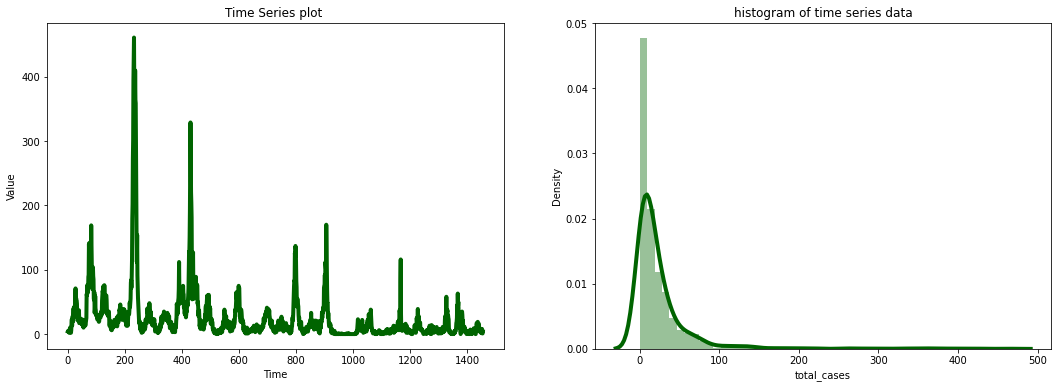

In [99]:
import seaborn as sns
#taking half length of data
split = round(len(df['total_cases'])/2)
# split two part of time series data 
X1,X2 = df['total_cases'][0:split],df['total_cases'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['total_cases'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['total_cases'],ax =ax[1])

**Dsitrbution over the Years**

In [101]:
df_sj.head()

Empty DataFrame
Columns: [city, year, weekofyear, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm, total_cases, month]
Index: []

[0 rows x 25 columns]

In [102]:
df_sj = df[['week_start_date','total_cases']]

In [103]:
#Drop null values from month column.
df_sj.dropna(subset = ["week_start_date"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [104]:


df_sj = df_sj.set_index('week_start_date')


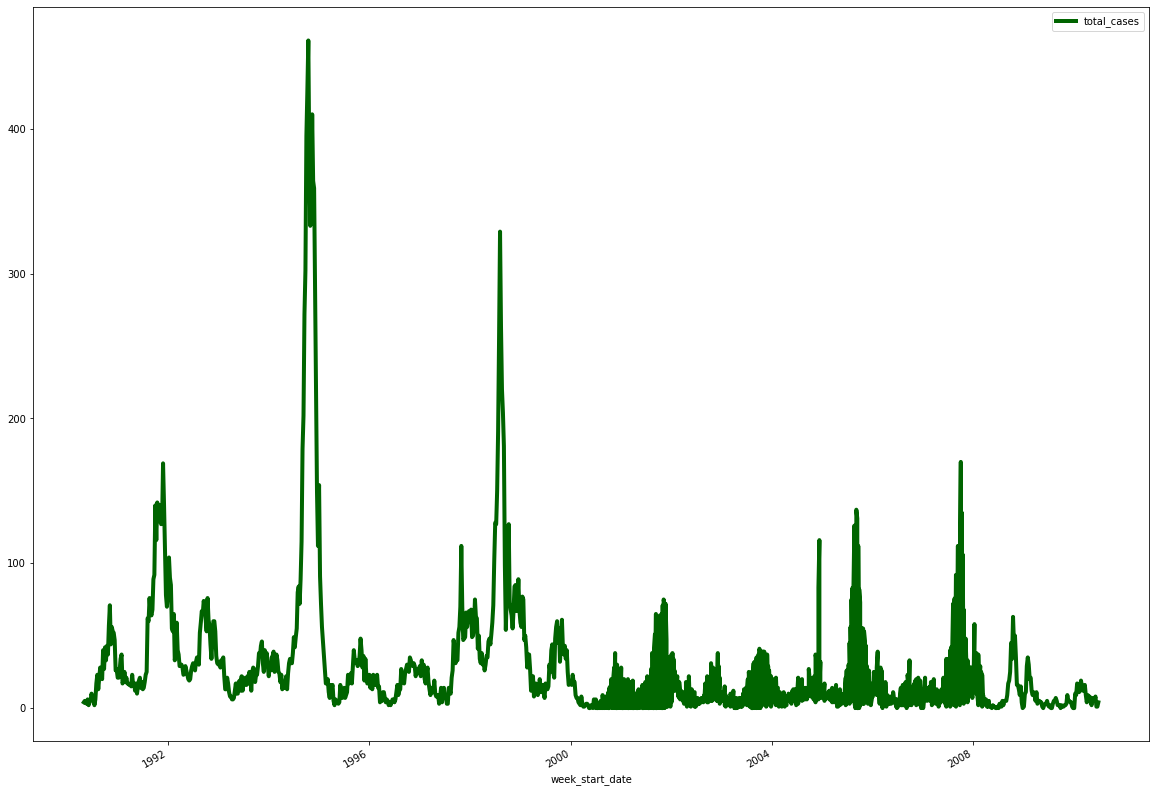

In [105]:
df_sj.plot(figsize=(20, 15))

In [117]:
# Set up test data to fit into model

# read in test data
test = pd.read_csv('/content/dengue_features_test.csv', parse_dates=[3])
#submission_format = pd.read_csv('./datasets/submission_format.csv')

#split into cities df
test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

# FrontFill to Impute into Missing values
test_sj = test_sj.fillna(method = 'ffill')
test_iq = test_iq.fillna(method = 'ffill')

# set index to the dates
test_sj.set_index('week_start_date', drop = True, inplace = True)
test_iq.set_index('week_start_date', drop = True, inplace = True)

# drop non-numerical values
test_sj.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)
test_iq.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)

# create month variable
test_sj['month'] = test_sj.index.month
test_iq['month'] = test_iq.index.month

Text(0, 0.5, 'Number of Cases')

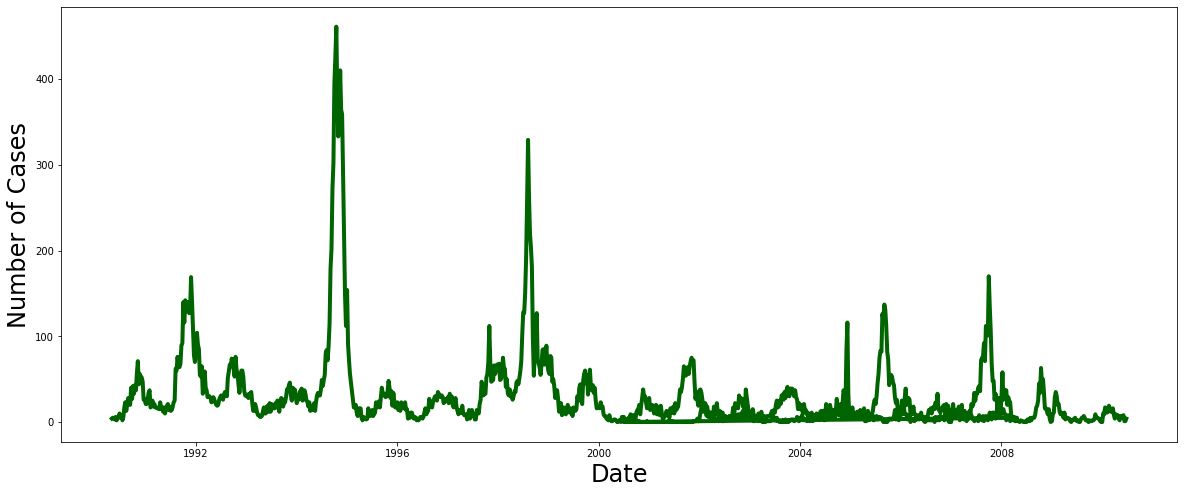

In [118]:
#plotting the distribution
plt.figure(figsize=(20,8))
plt.plot(df_sj['total_cases'])
plt.xlabel('Date', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 24)

Iquiois

**Checking for stanioraity**

In [109]:
from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(df_iq['total_cases'].values)

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: nan
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74

p-value: nan
Non-Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1671: RuntimeWarning: Mean of empty slice.
  resids = x - x.mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1702: RuntimeWarning: invalid value encountered in double_scalars
  eta = np.sum(resids.cumsum()**2) / (nobs**2)  # eq. 11, p. 165
/usr/local/lib/python3.7/dist-packages/stats


To check Stationary 


Before difference mean and Variance

mean1 = 37.259615 ,mean2 = 12.090659
var1 = 3096.341035 ,var2 = 390.321893


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


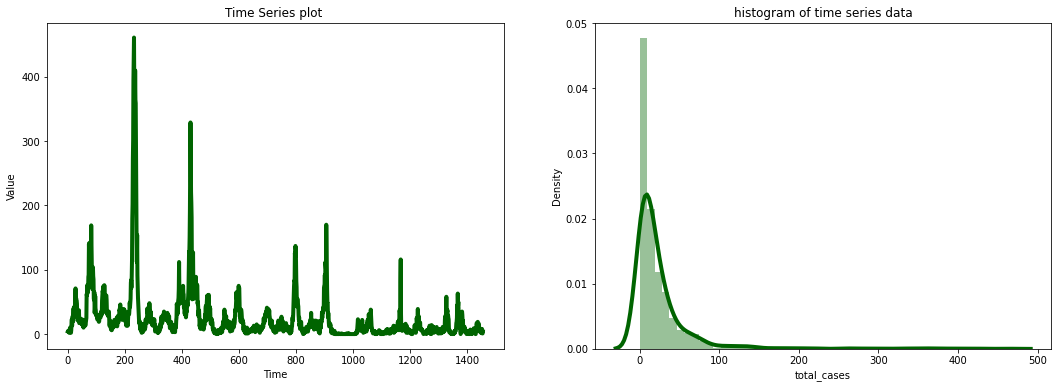

In [115]:
import seaborn as sns
#taking half length of data
split = round(len(df_iq['total_cases'])/2)
# split two part of time series data 
X1,X2 = df['total_cases'][0:split],df['total_cases'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['total_cases'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['total_cases'],ax =ax[1])

**Dsitrbution over the Years**

In [110]:
df_iq.head()

Empty DataFrame
Columns: [city, year, weekofyear, week_start_date, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm, total_cases, month]
Index: []

[0 rows x 26 columns]

In [111]:
df_iq = df[['week_start_date','total_cases']]

In [112]:
#Drop null values from month column.
df_iq.dropna(subset = ["week_start_date"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [113]:

df_iq = df_iq.set_index('week_start_date')

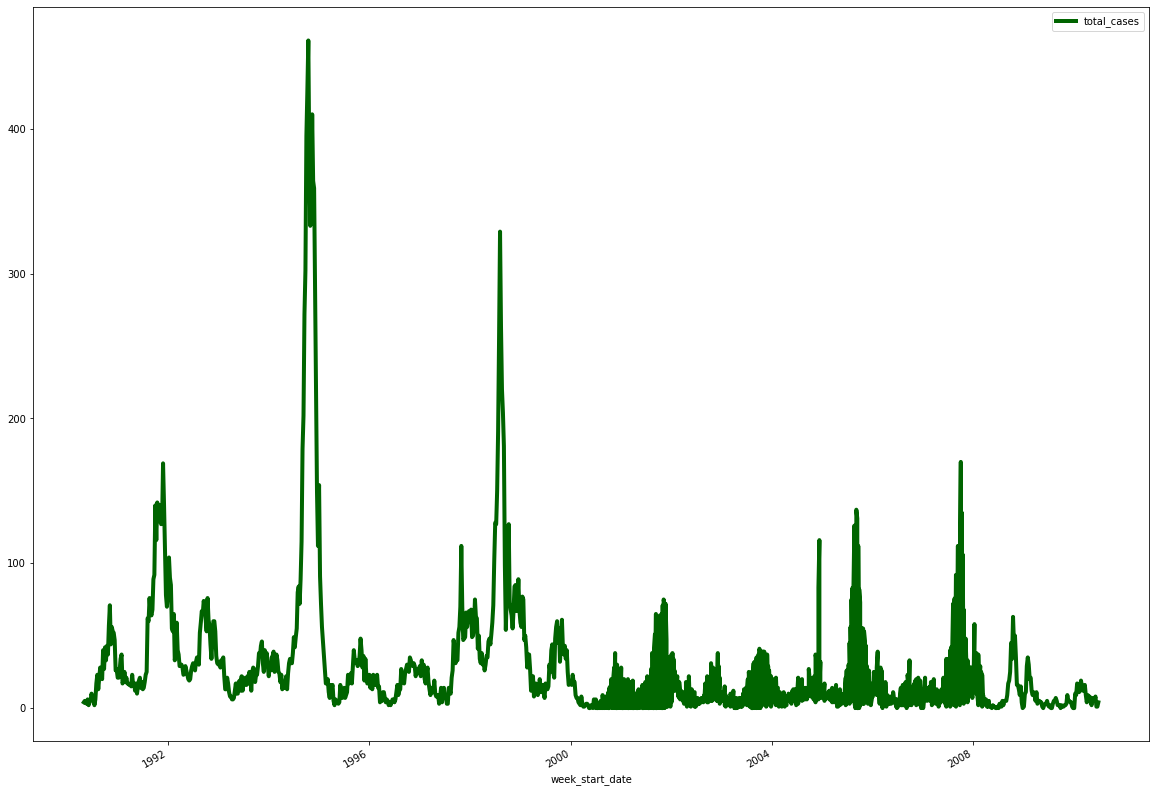

In [114]:
df_iq.plot(figsize=(20, 15))

# ACF and PACF plot

*SJ *

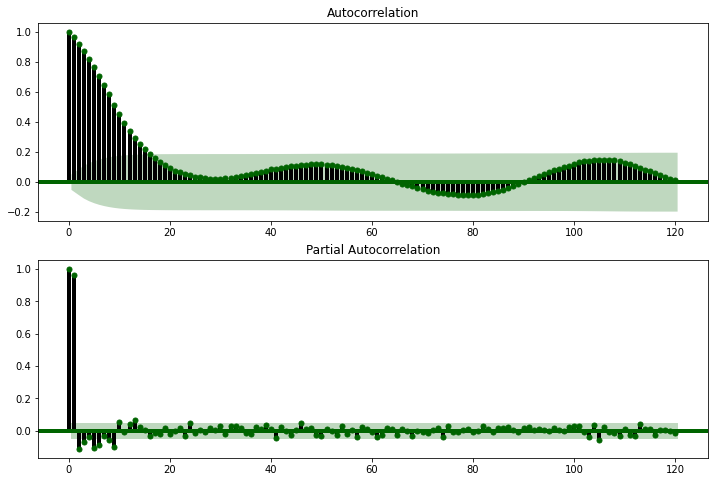

In [119]:
#Checking for corelation for san juan
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sj['total_cases'].dropna(),lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_sj['total_cases'].dropna(),lags=120,ax=ax2)

*IQ*

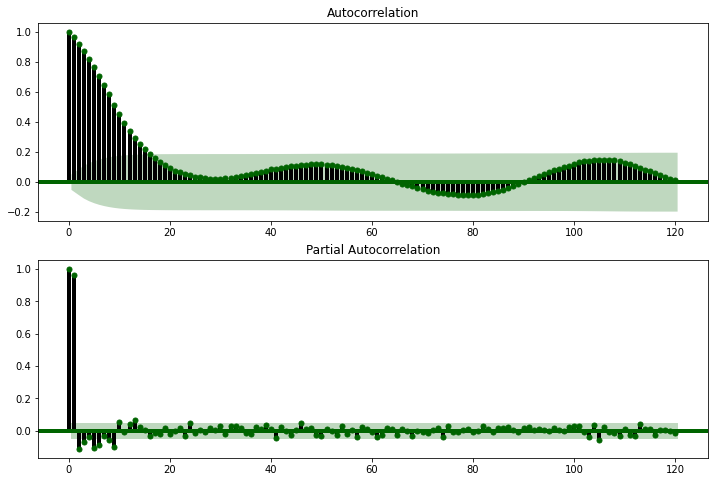

In [120]:
#Checking for corelation for iquatos
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_iq['total_cases'].dropna(),lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_iq['total_cases'].dropna(),lags=120,ax=ax2)

**AUTO ARIMA MODEL**

To acquire best model

In [121]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.2 MB/s 
     |████████████████████████████████| 9.8 MB 35.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [122]:
from pmdarima import auto_arima

**AUTO ARIMA CITIES**


In [123]:
#using auto arima to get the order of arima with the least AIC
arima_sj = auto_arima(df_sj['total_cases'],stationary = True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11266.621, Time=2.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15127.648, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11310.357, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13625.417, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15530.509, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11292.499, Time=0.71 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11264.674, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11297.104, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11294.858, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11266.626, Time=4.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11289.943, Time=0.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=11297.438, Time=4.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11280.321, Time=0.49 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 16.745 seconds


In [124]:
#we split the data into train and test in ratio of 0.8:0.2
train,test = df_sj.total_cases[1:df_sj.shape[0]-187],df_sj.total_cases[df_sj.shape[0]-187:]

ARIMA SJ

In [125]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [126]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 1,0,2 ARIMA Model
model =ARIMA(train, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            total_cases   No. Observations:                 1268
Model:                     ARMA(2, 1)   Log Likelihood               -4957.240
Method:                       css-mle   S.D. of innovations             12.055
Date:                Thu, 17 Mar 2022   AIC                           9924.481
Time:                        04:03:57   BIC                           9950.207
Sample:                             0   HQIC                          9934.145
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.8510      5.304      5.062      0.000      16.456      37.247
ar.L1.total_cases     1.8454      0.035     52.505      0.000       1.776       1.914
ar.L2.total_cases    -0.

In [127]:
#making predictions
predictions = model_fit.predict(len(train),len(train)+len(test)-1)

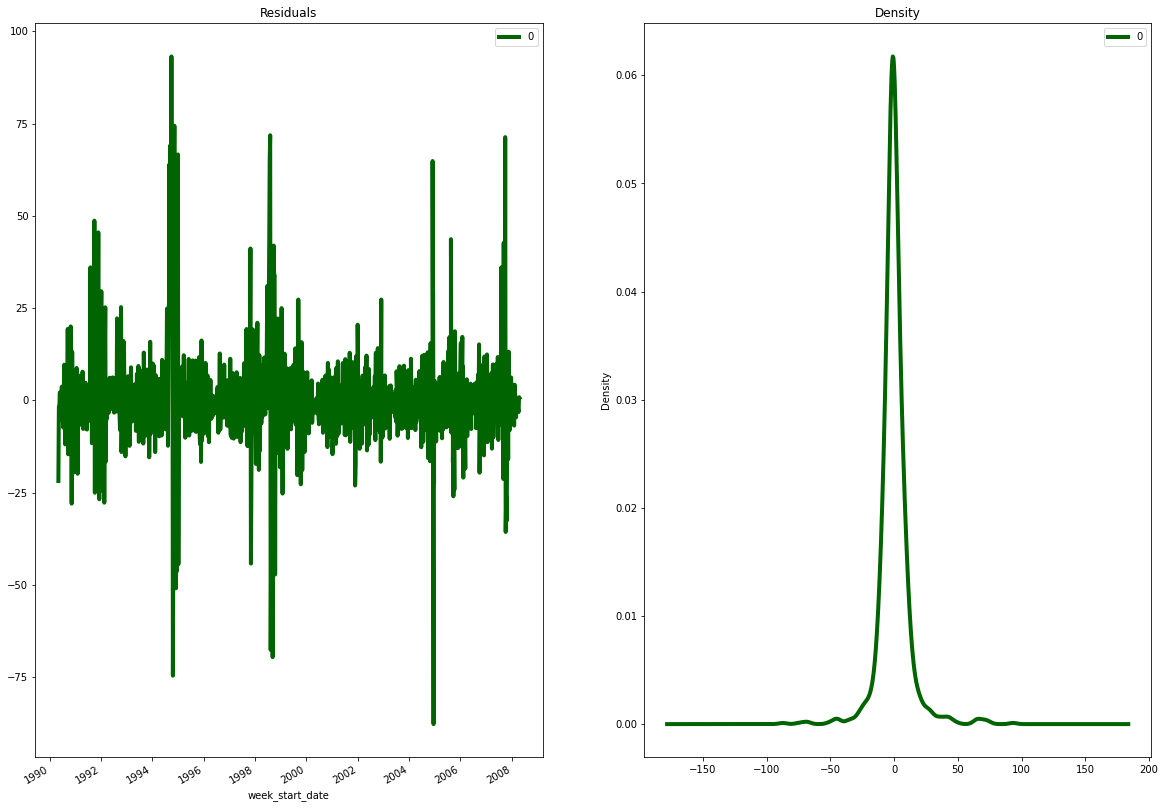

In [128]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(20,15))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [131]:
# Plot
plt.figure(figsize=(12,10), dpi=200)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(predictions, label='predictions')
#plt.title('predictions vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: ignored

In [130]:
from sklearn import metrics
mse = metrics.mean_squared_error(predictions,test)
mae = metrics.mean_absolute_error(predictions,test)
print("mse =",mse)
print("mae = ",mae)

mse = 433.2953698291155
mae =  19.60126925807677


**Find the optimal ARIMA model using Out-of-Time Cross validation**

In [132]:
df_sj.dtypes

total_cases    int64
dtype: object

In [133]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_sj.total_cases[:85].astype(float)
test = df_sj.total_cases[85:].astype(float)

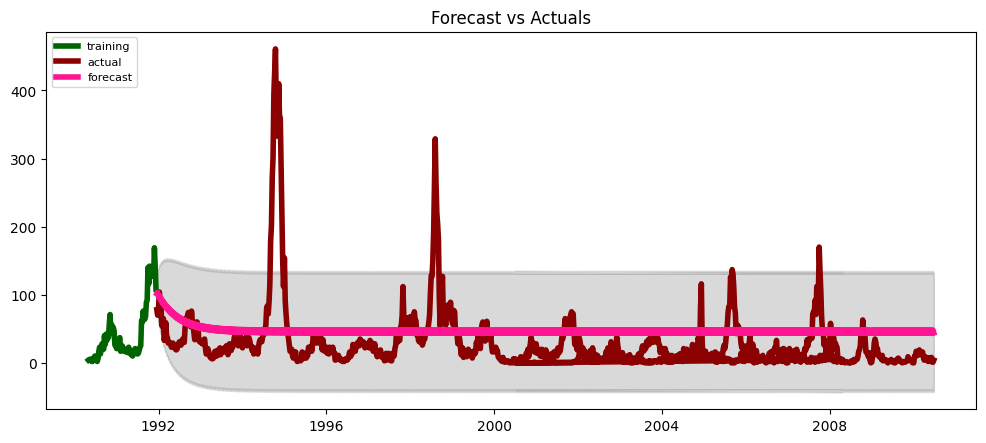

In [134]:
# Build Model
 
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

plotting decompostion graph

iquitois

In [135]:
from pmdarima import auto_arima

In [136]:
#using auto arima to get the order of arima with the least AIC
arima_iq = auto_arima(df_iq['total_cases'],stationary = True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11266.621, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15127.648, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11310.357, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13625.417, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15530.509, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11292.499, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11264.674, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11297.104, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11294.858, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11266.626, Time=2.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11289.943, Time=0.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=11297.438, Time=2.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11280.321, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.351 seconds


In [137]:
#we split the data into train and test in ratio of 0.8:0.2
train,test = df_iq.total_cases[1:df_iq.shape[0]-187],df_iq.total_cases[df_iq.shape[0]-187:]

In [138]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [139]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 1,0,2 ARIMA Model
model =ARIMA(train, order=(3,0,2))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            total_cases   No. Observations:                 1268
Model:                     ARMA(3, 2)   Log Likelihood               -4957.157
Method:                       css-mle   S.D. of innovations             12.054
Date:                Thu, 17 Mar 2022   AIC                           9928.313
Time:                        04:05:49   BIC                           9964.329
Sample:                             0   HQIC                          9941.843
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.8523      5.296      5.071      0.000      16.473      37.231
ar.L1.total_cases     1.6246      0.711      2.286      0.022       0.231       3.018
ar.L2.total_cases    -0.

In [140]:
#making predictions
predictions = model_fit.predict(len(train),len(train)+len(test)-1)

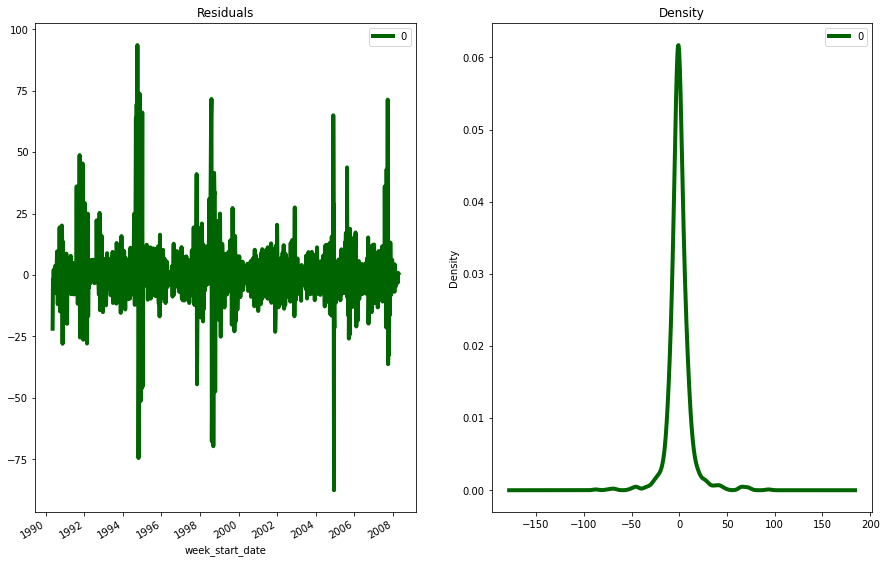

In [141]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [142]:
from sklearn import metrics
mse = metrics.mean_squared_error(predictions,test)
mae = metrics.mean_absolute_error(predictions,test)
print("mse =",mse)
print("mae = ",mae)

mse = 433.91068365982034
mae =  19.61562527372389


**Find the optimal ARIMA model using Out-of-Time Cross validation**

In [143]:
df_iq.dtypes

total_cases    int64
dtype: object

In [144]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_iq.total_cases[:85].astype(float)
test = df_iq.total_cases[85:].astype(float)

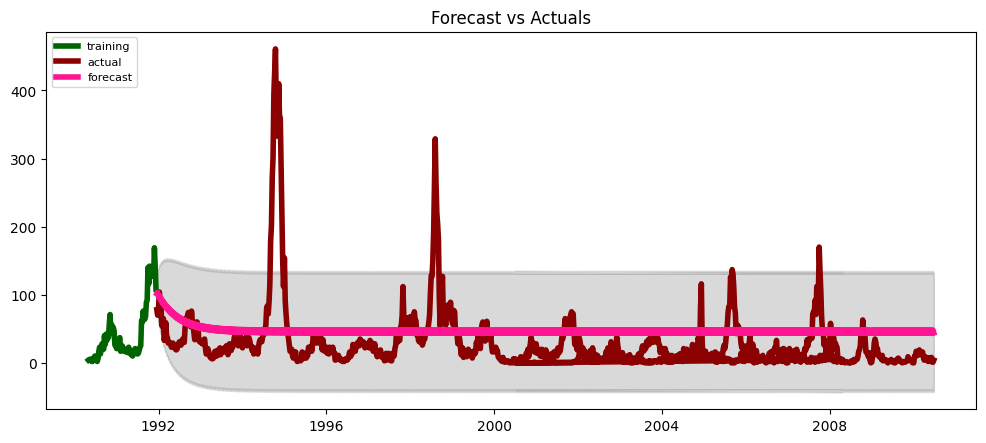

In [146]:
# Build Model
 
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Both Cities Combined**

In [147]:
from pmdarima import auto_arima

In [148]:
#using auto arima to get the order of arima with the least AIC
arima_all = auto_arima(df['total_cases'],stationary = True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11266.621, Time=4.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15127.648, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11310.357, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13625.417, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15530.509, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11292.499, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11264.674, Time=1.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11297.104, Time=0.94 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11294.858, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11266.626, Time=4.70 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11289.943, Time=0.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=11297.438, Time=4.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11280.321, Time=0.58 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 20.240 seconds


In [149]:
#we split the data into train and test in ratio of 0.8:0.2
train,test = df.total_cases[1:df.shape[0]-187],df.total_cases[df.shape[0]-187:]

In [150]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [151]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 1,0,2 ARIMA Model
model =ARIMA(train, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            total_cases   No. Observations:                 1268
Model:                     ARMA(2, 1)   Log Likelihood               -4957.240
Method:                       css-mle   S.D. of innovations             12.055
Date:                Thu, 17 Mar 2022   AIC                           9924.481
Time:                        04:06:32   BIC                           9950.207
Sample:                             0   HQIC                          9934.145
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.8510      5.304      5.062      0.000      16.456      37.247
ar.L1.total_cases     1.8454      0.035     52.505      0.000       1.776       1.914
ar.L2.total_cases    -0.

In [152]:
#making predictions
predictions = model_fit.predict(len(train),len(train)+len(test)-1)

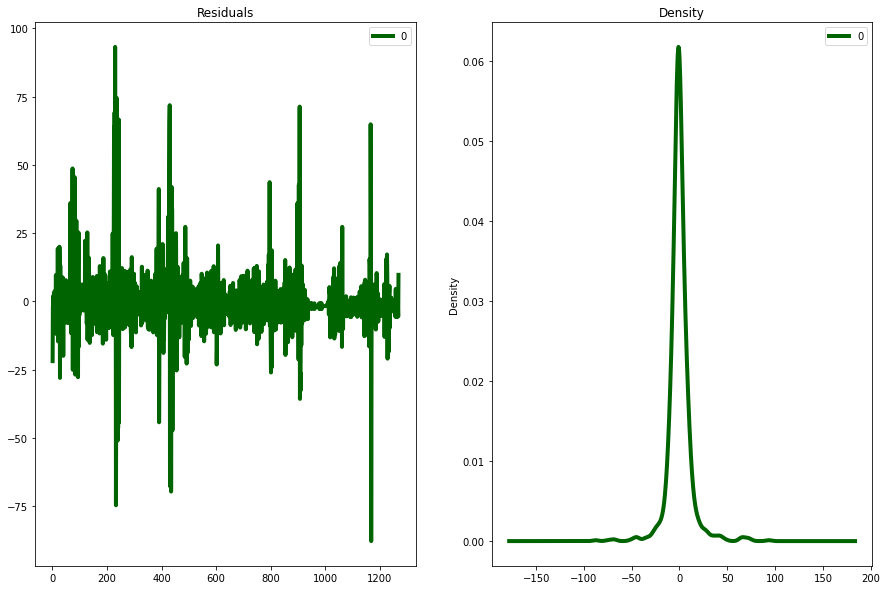

In [153]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [154]:
from sklearn import metrics
mse = metrics.mean_squared_error(predictions,test)
mae = metrics.mean_absolute_error(predictions,test)
print("mse =",mse)
print("mae = ",mae)

mse = 433.2953698291155
mae =  19.60126925807677


In [155]:
df.dtypes

city                                              int64
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [156]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.total_cases[:85].astype(float)
test = df.total_cases[85:].astype(float)

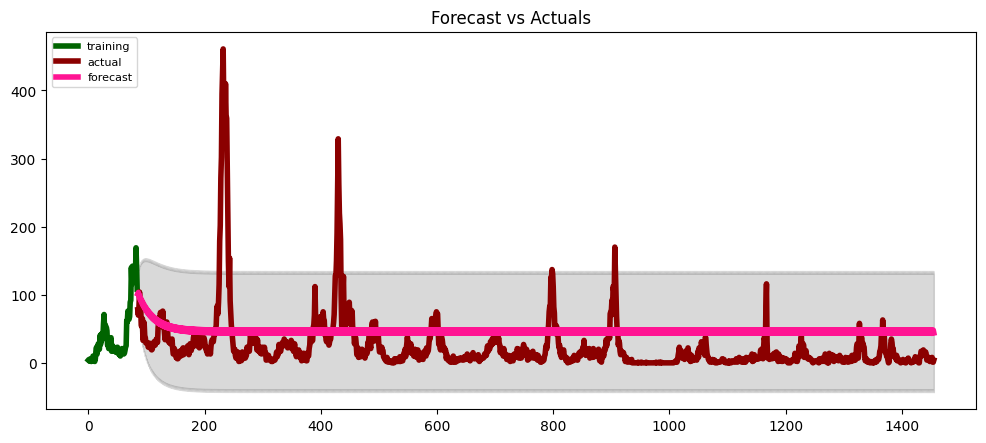

In [157]:
# Build Model
 
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(1371, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**AUGMENTED DICKEY FULLER  TEST  (ADF)**


NULL HYPOTHESIS: Time series = non-stationary

ALTERNATIVE HYPOTHESIS: Time series = stationary

Reject the null hypothesis if p_value is less than critical value at 5%

san juan series

In [ ]:
#for san juan
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
 
 
# extracting only the total cases count using values function
values = df_sj.total_cases
 
# passing the extracted total cases count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

the p value is 0.00 which less than alpha ,0.05 hence we reject the null hypothesis and conclude that our data is stationary

Iquitois

In [ ]:
#iquatos
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
 
 
# extracting only the total cases count using values function
values = df_iq.total_cases
 
# passing the extracted total cases count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

the p value is 0.00 which is less than alpha ,0.05 hence we reject the null hypothesis and conclude that the series is stationary

**both** **cities** **series** **combined**

In [ ]:
#whole data
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
 
 
# extracting only the total cases count using values function
values = df.total_cases
 
# passing the extracted total cases count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

the p value 0.00 is less than alpha 0.05 hence we reject the null hypothesis and conclude thta our data is stationary

**KWIAKOSKI-PHILLIPS-SCHMIDT-SHIN(KPSS TEST)**


NULL HYPOTHESIS: time series = stationary 

ALTERNATIVE HYPOTHESIS: time series = non-stationary

Reject null hypothesis if p_value is less than critical value at 5% 

san juan

using both the adf and kpss tests we can conclude that the san juan series is stationary

iquatos

using both adf and kpss test we conclude that the iquatos series is stationary

combined cities

the combined cities series show that it is stationary using the adf test and non-stationary using the kpss test hence we conclude that our data is difference stationary

By using both test and finding different conclusion, we can conclude that our time series is difference stationary basing on the following case scenarios:

**Case 1**: Both tests conclude that the series is not stationary - The series is not stationary

**Case 2**: Both tests conclude that the series is stationary - The series is stationary

**Case 3**: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

**Case 4**: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

### **FB PROPHET**

In [164]:
#Importing the necessary libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [165]:
#Selecting the time column and total cases column
df_sj = df[['week_start_date','total_cases']]

In [166]:
#df_sj = df.set_index('week_start_date')

In [167]:
#Setting the required columns since we only need date and total cases
X= df_sj['week_start_date']
y= df_sj['total_cases']

In [168]:
#Setting our required columns to the required datestamp and target column
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X)
train_dataset['y']=y
train_dataset.head(2)

ds  y
0 1990-04-30  4
1 1990-05-07  5

In [169]:
# Fitting the prophet in the dataset
prophet_basic = Prophet(daily_seasonality=False)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [170]:
#Making future predictions using Prophet
future= prophet_basic.make_future_dataframe(periods=52, freq='W')
future.tail(2)

ds
1099 2011-06-12
1100 2011-06-19

In [171]:
#Getting the predicted values from the model
forecast=prophet_basic.predict(future)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1990-04-30  32.707313  -32.379530   63.738840    32.707313    32.707313   
1 1990-05-07  32.816679  -29.123127   62.717025    32.816679    32.816679   
2 1990-05-14  32.926045  -32.454276   64.524272    32.926045    32.926045   
3 1990-05-21  33.035412  -32.552044   67.187900    33.035412    33.035412   
4 1990-05-28  33.144778  -31.780762   68.983948    33.144778    33.144778   

   additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0      -16.674904            -16.674904            -16.674904 -16.674904   
1      -16.507164            -16.507164            -16.507164 -16.507164   
2      -16.186723            -16.186723            -16.186723 -16.186723   
3      -15.907272            -15.907272            -15.907272 -15.907272   
4      -15.552690            -15.552690            -15.552690 -15.552690   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -16.674904    -16.674904                   0.0   
1    -16.507164    -16.507164                   0.0   
2    -16.186723    -16.186723                   0.0   
3    -15.907272    -15.907272                   0.0   
4    -15.552690    -15.552690                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  16.032409  
1                         0.0                         0.0  16.309515  
2                         0.0                         0.0  16.739323  
3                         0.0                         0.0  17.128139  
4                         0.0                         0.0  17.592088

In [172]:
#Dropping the unnecesary output 
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

ds       yhat  yhat_lower  yhat_upper
0 1990-04-30  16.032409  -32.379530   63.738840
1 1990-05-07  16.309515  -29.123127   62.717025
2 1990-05-14  16.739323  -32.454276   64.524272
3 1990-05-21  17.128139  -32.552044   67.187900
4 1990-05-28  17.592088  -31.780762   68.983948

Text(0.5, 1.0, 'Forecasted values vs actual values')

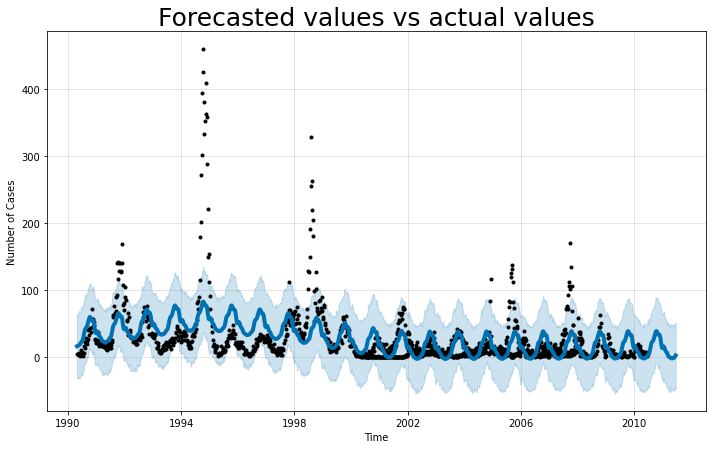

In [173]:
#plotting The predicted values against the actual values
prophet_basic.plot(forecast,xlabel='Time',
                             ylabel='Number of Cases')
plt.title('Forecasted values vs actual values', size = 25)


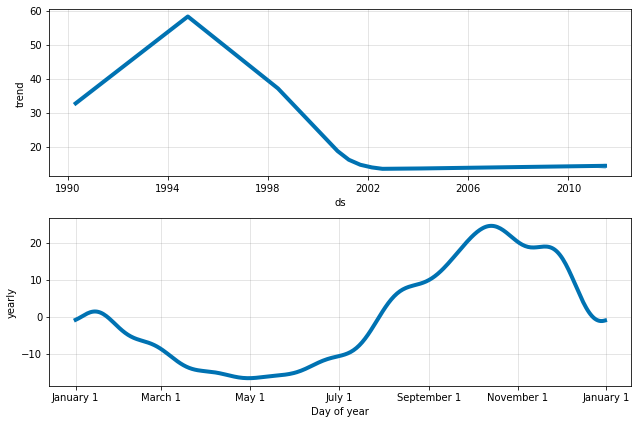

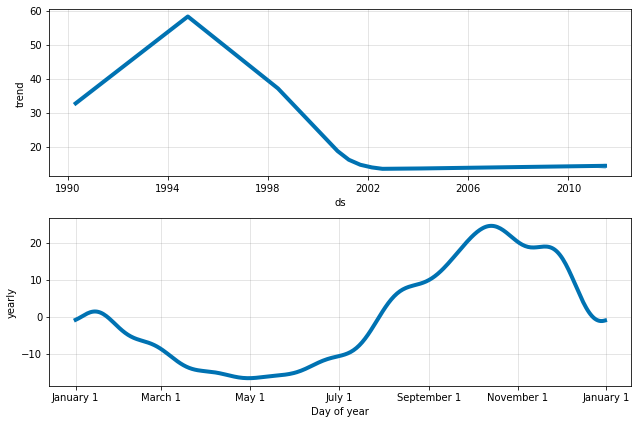

In [174]:
#Checking the components of the predicted values
prophet_basic.plot_components(forecast)

Text(0.5, 1.0, 'Plot for changepoint along the years')

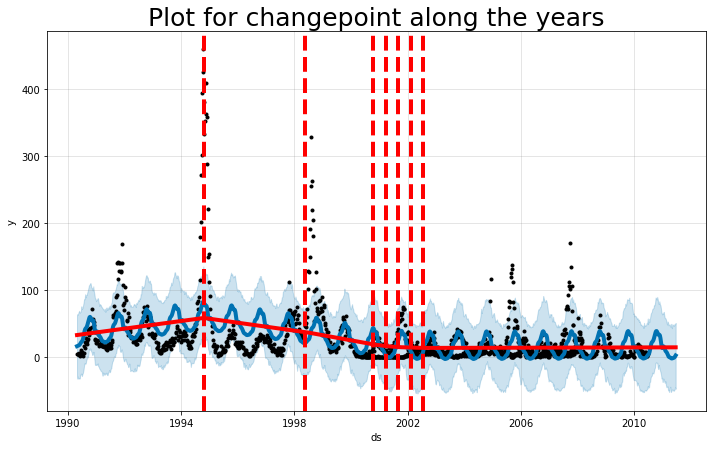

In [175]:
#Finding the changepoints of the series
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)
plt.title('Plot for changepoint along the years', size =25)

In [176]:
#Viewing some of the changepoints periods in the series
prophet_basic.changepoints.head()

47    1991-03-26
93    1992-02-12
140   1993-01-08
186   1993-11-26
233   1994-10-22
Name: ds, dtype: datetime64[ns]

In [177]:
#Creating a cutoff point so as to calculate its accuracy metrics
cutoffs = pd.to_datetime(['2004-01-03', '2004-07-03', '2005-01-01'])

In [178]:
#Cross validating the predicted results in the cuttoff points and the actual values
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_basic, cutoffs=cutoffs, horizon='365 DAYS')


  0%|          | 0/3 [00:00<?, ?it/s]

In [179]:
#Finding the metrics of the predicted values
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae     mdape  coverage
0 40 days  138.902019  11.785670   9.700692  1.093214       1.0
1 42 days  144.457912  12.019065  10.048223  1.093214       1.0
2 47 days  139.395353  11.806581   9.745697  1.125585       1.0
3 49 days  146.770987  12.114908  10.130678  1.141930       1.0
4 54 days  170.780533  13.068303  10.998440  1.265634       1.0

**CONCLUSIONS**

1) As the temperature increases in both cities the total number of cases increase too. Mosquitos Require a warm environment to breed which translates to increased cases recorded per week. As the temperature begins to drop the total cases drop too.

2) We note that as the precipitation amount increases along the year in both cities the total cases increase concurrently. Mosquitos Require water to lay their eggs, so as the amount of water in a surrounding increases we note increase in cases.

3) As humidity increases along the year between the two cities, the total number of cases increases. This can be tied to the fact that mosquitos require a humid environment to lay eggs and grow.

4) The  mean vegetation index in San Juan, Puerto Rico is steady along the year but drops towards the end of year, this is because the city is located along the coastline. The cases recorded along the weeks similarly drop towards that time. Mosquitos require a vegetation to live in and thus a drop in the vegetation around them leads to a drop in their numbers too.


5) The mean vegetation index of Iquitos, Peru seem to change over the year mainly because the the city is located inland and the vegetaion around it is affected by the amount of precipitation falling on the land. This index affects the cases recorded since as the vegetation increase the cases increase too.

**make csv**

**Write predictions out to CSV for submission**

In [180]:
from google.colab import files

df_sj.to_csv('output_sj.csv', encoding = 'utf-8-sig') 
files.download('output_sj.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
from google.colab import files

df_iq.to_csv('output_iq.csv', encoding = 'utf-8-sig') 
files.download('output_iq.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Creating a Virtual Envronment**

install virtualenv on your current Python installation to build a virtual environment

In [183]:
!pip install virtualenv

     |████████████████████████████████| 8.7 MB 8.7 MB/s 
     |████████████████████████████████| 461 kB 52.2 MB/s 


Checking virtual env --version

In [184]:
!virtualenv --version

virtualenv 20.13.3 from /usr/local/lib/python3.7/dist-packages/virtualenv/__init__.py


In [185]:
import pickle

# open a file, where you want to store the data
file = open('app_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

NameError: ignored

In [ ]:
!pip install Flask

In [ ]:
from flask import Flask

app=Flask(__name__)

@app.route('/', methods=['GET'])

def home():
    return "Homepage Here"

if __name__=="__main__":
    app.run()

Creating a Machine Learning Model to Be Deployed Using Heroku